## Using Python to Draw Phase Diagrams

It is possible to quickly generate some plots of a system of differential equations using inbuilt python packages numpy and scipy, and the SymPy module.

Using the symbiosis model as an example, here is a guide to:

- plotting the system in time and phase space, 
- plotting a quiver plot with nullclines
- calculating the eigenvalues from the Jacobian

The Lotka- Volterra model describes the relationship between the population of predators and prey in an area, and is given by the equations below:

## - $\frac{du}{dt}= u ( a - u + bv)$

## - $\frac{dv}{dt}= v ( c + du - v)$


In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as sm
#import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib




### Firstly, the equations are entered in the form of a function which generates a numpy array. The function requires an array with $[x_0, y_0]$, and returns an array of $[\frac{du}{dt}, \frac{dv}{dt}]$

In [2]:
# define system in terms of a Numpy array
def system(xvals, t, a, b, c, d):
    
    
    u = xvals[0]
    v = xvals[1]
    
    f1 = (u * ( a - u + (b * v)))
    f2 = (v *( c + (d * u) - v))
    
    return [f1, f2]


### Then, the system is integrated over an array of t values, from initial x and y values using the scipy function *odeint*. 

type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.

In [3]:

timespan = np.linspace(0, 20,  1000)  # array of 1000 t values from t = 0 to t= 20

int0 = np.array([10, 2]) # initial values for the system: x0 = 10, y0 = 2

params = np.asarray(np.random.rand(4))
params_tuple = tuple(params)


soln = odeint(system, int0, timespan, args = params_tuple) #the odeint function returns the integrated values
                                                        #and information about the integration as a dictionary, 
                                                        #here assigned the value 'infodict'

u = soln[:, 0]
v = soln[:, 1]

### The results of this integration can be plotted over time and in phase space using the *matplotlib* library

This involves creating a figure with two subplots, using one to plot x and y against t, and the other to plot x against y.
Matplotlib functions are very explicitly named, and more information on their use can be found at the [matplotlib cookbook](https://matplotlib.org/).



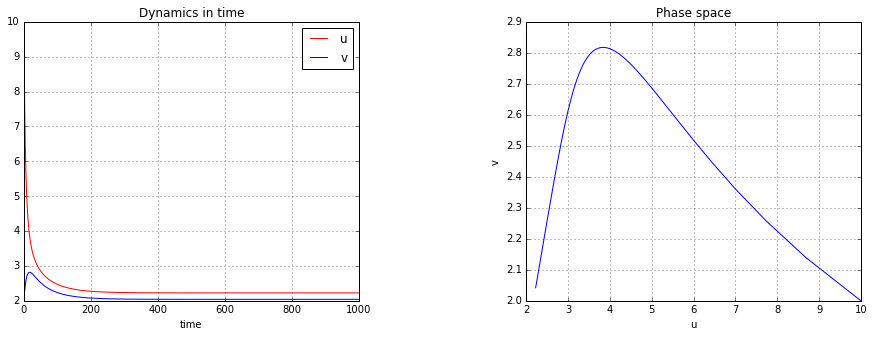

In [4]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(u, 'r-', label='u')
ax1.plot(v, 'b-', label='v')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(u, v, color="blue")
ax2.set_xlabel("u")
ax2.set_ylabel("v")  
ax2.set_title("Phase space")
ax2.grid()

### Calculate equilibria of system using sympy
Firstly, the equations must be rewritten in sympy format. Then, the equations are set to zero using the sympy function *Eq*, then the equilibria are calculated by solving the equations using the function *solve*. 

This outputs an array of the fixed points, assigned to the variable *equilibria*.

In [5]:
a, b, c, d = params
u, v = sm.symbols('u, v', negative=False)
U = u * (a - u + (b * v))
V = v * (c + (d * u) - v)

# use sympy's way of setting equations to zero
UEqual = sm.Eq(U, 0)
VEqual = sm.Eq(V, 0)

# compute fixed points
equilibria = sm.solve( (UEqual, VEqual), u, v )

equilibria

[(0.0, 0.0),
 (0.0, 0.971913593013902),
 (0.549160031884647, 0.0),
 (2.22671339394464, 2.04208578614484)]

### Using matplotlib.quiver.

To generate a quiverplot, the direction of the derivative at each point plotted on a graph that is overlaid with the nullclines and equilibria.

Here, there is a lot of code but the important part 

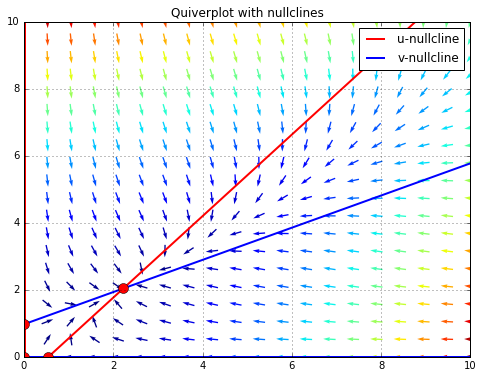

In [22]:
fig2 = plt.figure(figsize=(8,6))

x = np.linspace(0,10,20)
y = np.arange(0,10,20)

# plot nullclines
uformula = [(i - a) / b for i in x]
vformula = [c + (d *  i) for i in x]

plot(x, uformula,'r-', 
     lw=2, label='u-nullcline')
plt.axhline(color = 'blue', lw = 2)
plot(x, vformula,'b-', 
     lw=2, label='v-nullcline')
plt.axvline(color = 'red', lw = 4)

# plot fixed points
for point in equilibria:
    plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
plt.title("Quiverplot with nullclines")
plt.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = system([X1, Y1], timespan, a, b, c, d)                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.grid()

### Using sympy to compute the jacobian and eigenvalues

Once the equations have been defined in sympy, the jacobian can be calculated using sympy's *jacobian* function.
Iterating over the equilibria allows for the calculation of eigenvalues. 

In [7]:
# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ U, V ])
Mat = sm.Matrix([ u, v ])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('---------------------')

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (u, item[0]), (v, item[1]) ])
    print('The eigenvalues for the fixed point (%s, %s) are %s and %s' 
          %(item[0], item[1], list(eqmat.eigenvals().items())[0], list(eqmat.eigenvals().items())[1]))
    print('-------------------------------------------')

Jacobian Matrix([[-2*u + 0.821490151609629*v + 0.549160031884647, 0.821490151609629*u], [0.480606168733336*v, 0.480606168733336*u - 2*v + 0.971913593013902]])
---------------------
The eigenvalues for the fixed point (0.0, 0.0) are (485956796506951/500000000000000, 1) and (549160031884647/1000000000000000, 1)
-------------------------------------------
The eigenvalues for the fixed point (0.0, 0.971913593013902) are (-485956796506951/500000000000000, 1) and (13475774767611/10000000000000, 1)
-------------------------------------------
The eigenvalues for the fixed point (0.549160031884647, 0.0) are (61792164597973/50000000000000, 1) and (-549160031884647/1000000000000000, 1)
-------------------------------------------
The eigenvalues for the fixed point (2.22671339394464, 2.04208578614484) are (-106719979502237/50000000000000 + sqrt(450948199740096177413430665245)/500000000000000, 1) and (-106719979502237/50000000000000 - sqrt(450948199740096177413430665245)/500000000000000, 1)
-------